<a href="https://colab.research.google.com/github/RamaHM1/kecerdasanbuatan/blob/main/neural_network/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Download DataSet Daun Herbal
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=17I-kdCrpv0wZgisi4LCO2kTOlzR0ctoB' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=17I-kdCrpv0wZgisi4LCO2kTOlzR0ctoB" -O /tmp/herbal.zip && rm -rf /tmp/cookies.txt

--2021-11-12 11:08:08--  https://docs.google.com/uc?export=download&confirm=rJE6&id=17I-kdCrpv0wZgisi4LCO2kTOlzR0ctoB
Resolving docs.google.com (docs.google.com)... 172.217.15.110, 2607:f8b0:4004:801::200e
Connecting to docs.google.com (docs.google.com)|172.217.15.110|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-58-docs.googleusercontent.com/docs/securesc/gfbpc6dq63ff5ncvq74unal73p1cunft/bseqd5r2vaahjvaa3qppargkipm5chtn/1636715250000/15542249348961723767/02825496444940864865Z/17I-kdCrpv0wZgisi4LCO2kTOlzR0ctoB?e=download [following]
--2021-11-12 11:08:08--  https://doc-08-58-docs.googleusercontent.com/docs/securesc/gfbpc6dq63ff5ncvq74unal73p1cunft/bseqd5r2vaahjvaa3qppargkipm5chtn/1636715250000/15542249348961723767/02825496444940864865Z/17I-kdCrpv0wZgisi4LCO2kTOlzR0ctoB?e=download
Resolving doc-08-58-docs.googleusercontent.com (doc-08-58-docs.googleusercontent.com)... 172.217.13.225, 2607:f8b0:4004:809::2001
Connecting to doc-0

In [ ]:
import os
import zipfile

local_zip = '/tmp/herbal.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/herbal'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_daun_jeruk_nipis_dir = os.path.join(train_dir, 'daun_jeruk_nipis')
train_daun_jambu_dir = os.path.join(train_dir, 'daun_jambu')

validation_daun_jeruk_nipis_dir = os.path.join(validation_dir, 'daun_jeruk_nipis')
validation_daun_jambu_dir = os.path.join(validation_dir, 'daun_jambu')

In [ ]:
# Cek penamaan image yang ada di folder train_cats_dir dan train_dogs_dir
print(os.listdir(train_daun_jeruk_nipis_dir)[:10])
print(os.listdir(train_daun_jambu_dir)[:10])

['jeruknipis.30.jpg', 'jeruknipis.2.jpg', 'jeruknipis.20.jpg', 'jeruknipis.15.jpg', 'jeruknipis.26.jpg', 'jeruknipis.28.jpg', 'jeruknipis.24.jpg', 'jeruknipis.9.jpg', 'jeruknipis.11.jpg', 'jeruknipis.17.jpg']
['jambu.27.jpg', 'jambu.34.jpg', 'jambu.15.jpg', 'jambu.22.jpg', 'jambu.17.jpg', 'jambu.20.jpg', 'jambu.25.jpg', 'jambu.31.jpg', 'jambu.2.jpg', 'jambu.1.jpg']


In [ ]:
# Cek jumlah data train dan data validation
print('total training daun jeruk nipis images:', len(os.listdir(train_daun_jeruk_nipis_dir)))
print('total training daun jambu images:', len(os.listdir(train_daun_jambu_dir)))
print('total validation daun jeruk nipis images:', len(os.listdir(validation_daun_jeruk_nipis_dir)))
print('total validation daun jambu images:', len(os.listdir(validation_daun_jambu_dir)))

total training daun jeruk nipis images: 35
total training daun jambu images: 35
total validation daun jeruk nipis images: 15
total validation daun jambu images: 15


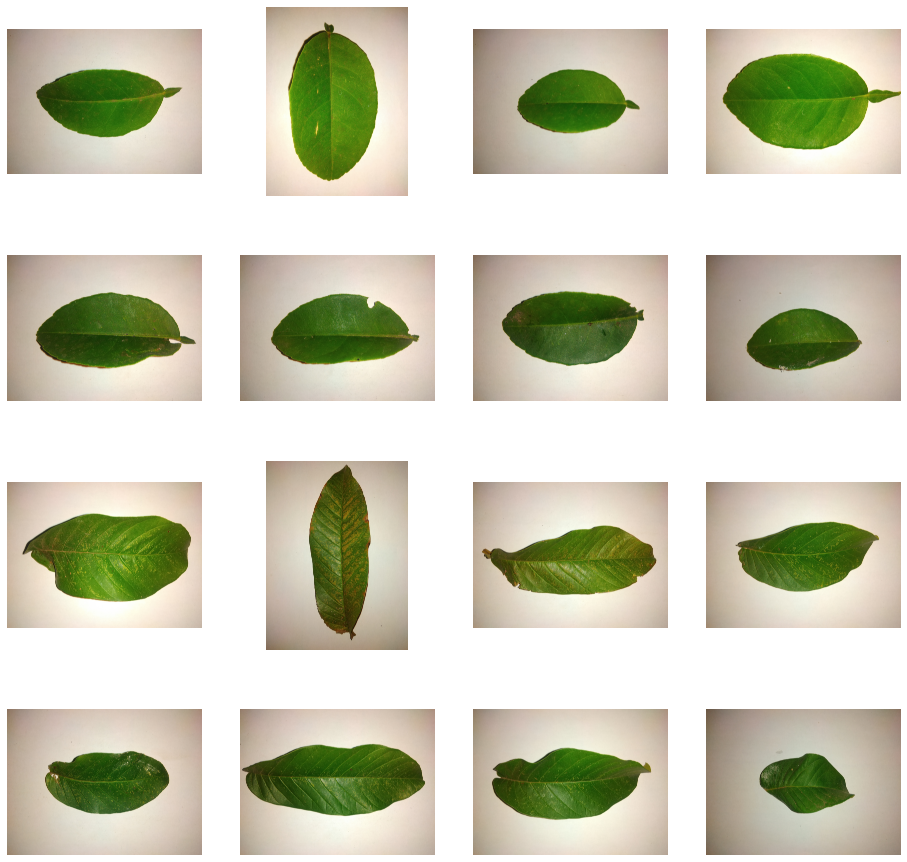

In [ ]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_daun_jeruk_nipis_pix = [os.path.join(train_daun_jeruk_nipis_dir, fname) 
                for fname in os.listdir(train_daun_jeruk_nipis_dir)[pic_index-8:pic_index]]
next_daun_jambu_pix = [os.path.join(train_daun_jambu_dir, fname) 
                for fname in os.listdir(train_daun_jambu_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_daun_jeruk_nipis_pix+next_daun_jambu_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

<h3>Data Preprocessing</h3>

In [ ]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (70, 150, 150, 3)
Train Label =  (70,)
Validation Data =  (30, 150, 150, 3)
Validation Label =  (30,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [165 181 194]
Data setelah di-normalisasi  [0.64705884 0.70980394 0.7607843 ]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[30:40])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[30:40])

Label sebelum di-encoder  ['daun_jambu' 'daun_jambu' 'daun_jambu' 'daun_jambu' 'daun_jambu'
 'daun_jeruk_nipis' 'daun_jeruk_nipis' 'daun_jeruk_nipis'
 'daun_jeruk_nipis' 'daun_jeruk_nipis']
Label setelah di-encoder  [0 0 0 0 0 1 1 1 1 1]


<h3>Definisikan Model</h3>

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [ ]:
# Tampilkan model summary
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten_4 (Flatten)         (None, 67500)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               8640128   
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 8,640,257
Trainable params: 8,640,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
H = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
4/4 [==============================] - 1s 105ms/step - loss: 30.4246 - acc: 0.5286 - val_loss: 21.8383 - val_acc: 0.5000
Epoch 2/50
4/4 [==============================] - 0s 57ms/step - loss: 15.1180 - acc: 0.5429 - val_loss: 8.2751 - val_acc: 0.5000
Epoch 3/50
4/4 [==============================] - 0s 55ms/step - loss: 7.6005 - acc: 0.5000 - val_loss: 2.4910 - val_acc: 0.5000
Epoch 4/50
4/4 [==============================] - 0s 58ms/step - loss: 2.9673 - acc: 0.5571 - val_loss: 0.9873 - val_acc: 0.7333
Epoch 5/50
4/4 [==============================] - 0s 55ms/step - loss: 2.0430 - acc: 0.6286 - val_loss: 0.7693 - val_acc: 0.7667
Epoch 6/50
4/4 [==============================] - 0s 58ms/step - loss: 1.3158 - acc: 0.6714 - val_loss: 0.5924 - val_acc: 0.9000
Epoch 7/50
4/4 [==============================] - 0s 59ms/step - loss: 0.6805 - acc: 0.8143 - val_loss: 0.7520 - val_acc: 0.8333
Epoch 8/50
4/4 [==============================] - 0s 58ms/step - loss: 0.4493 - acc: 0.9143 -

<h3>Evaluasi Model</h3>

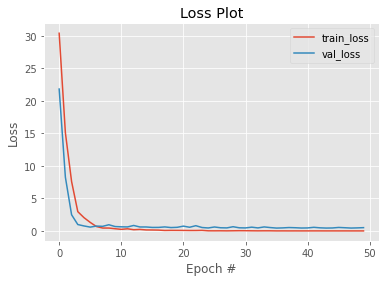

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

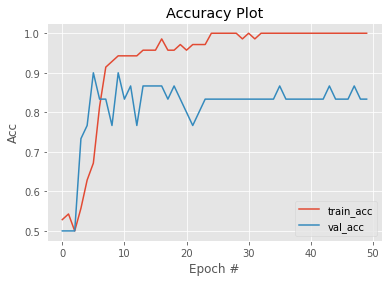

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.78      0.93      0.85        15

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30

